# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix,r2_score, classification_report,roc_auc_score,roc_curve,mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression,Perceptron
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics

# Task 01

In [ ]:
#Loading

dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Information: 
 None


Statistica Summary: 
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.6

<Figure size 1000x800 with 0 Axes>

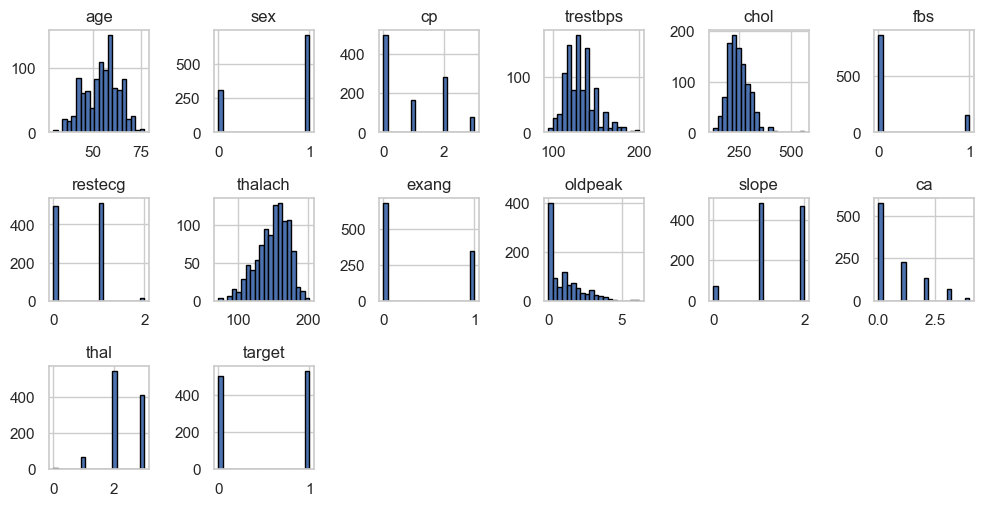


Target Class Distribution:
1    526
0    499
Name: target, dtype: int64


In [ ]:
#A (Basic Infromation And Statistical Summary)
print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

# Feature distributions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
dataset.hist(bins=20, figsize=(10, 10), layout=(6, 6), edgecolor="black")
plt.tight_layout()
plt.show()

# Target Class Distribution
print("\nTarget Class Distribution:")
print(dataset['target'].value_counts())

In [ ]:
if dataset.isnull().values.any():
    missingValues = dataset.isnull().sum()
    print("Missing Values:\n", missingValues)

    cleanedDataset = dataset.fillna(dataset.mean())
    print("Dataset After Removing Missing Values: ", cleanedDataset)
else:
    print("No missing values in the dataset.")


if dataset.duplicated().any():
    duplicateRecords = dataset.duplicated().sum()
    print("\nDuplicate Records:\n", duplicateRecords)

    cleanedDataset = dataset.drop_duplicates()
    print("Dataset After Removing Duplicates: ", cleanedDataset)
else:
    print("No duplicate records in the dataset.")

categoricalFeatures = dataset.select_dtypes(include=['object']).columns
print("\nCategorical Features:\n", categoricalFeatures)
#Here No Categirical Feature Exists!!
print(dataset)

No missing values in the dataset.

Duplicate Records:
 723
Dataset After Removing Duplicates:       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#SPlitting
x = dataset.drop('target', axis = 1)
y = dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

trainAccuracies = []
testAccuracies = []

In [ ]:
print("=================PART B (PENALTY = L1)=================\n")
LR = LogisticRegression(penalty='l1',solver='liblinear')

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================PART B (PENALTY = L1)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


In [ ]:
print("=================PART C (PENALTY = L2)=================\n")
LR = LogisticRegression(penalty='l2',solver='liblinear')

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")
trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================PART C (PENALTY = L2)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


In [ ]:
print("=================PART D (PENALTY = elasticnet)=================\n")
LR = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================PART D (PENALTY = elasticnet)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.84


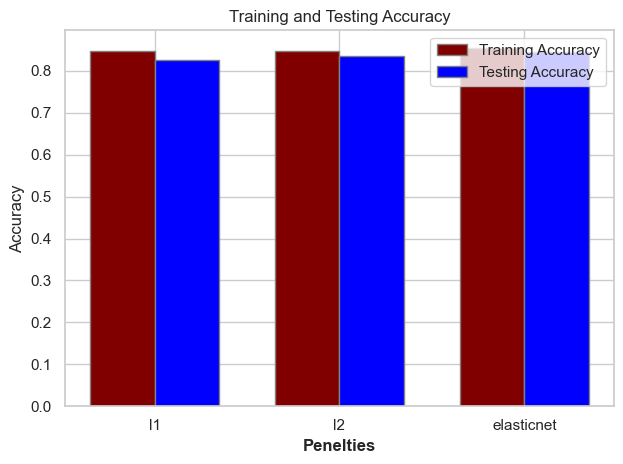

In [ ]:
#E

LR_Panelties = ['l1','l2','elasticnet']
bar_width = 0.35

r1 = np.arange(len(LR_Panelties))
r2 = [x + bar_width for x in r1]

plt.bar(r1, trainAccuracies, color='maroon', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testAccuracies, color='blue', width=bar_width, edgecolor='grey', label='Testing Accuracy')

plt.xlabel('Penelties', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], LR_Panelties)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#F

# I had encountered error while applyng penalities without defining solver, after solver defination error was resolved!!
# I adjusted max_iter parameter to remove warning (Was not Converging) and improved accuracy!!

In [ ]:
#G

#I used solver additionally!! without defining solver there was occuring an error!!

# Task 02

In [ ]:
irisDataset = pd.read_csv('Iris.csv')
irisDataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = irisDataset.drop('Species',axis=1)
Y = irisDataset['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.6, random_state=42)

trainAccuracies = []
testAccuracies = []

In [ ]:
print("=================(Solver = saga)=================\n")
LR = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = saga)=================

Training Accuracy : 0.93
Testing Accuracy  : 0.96


In [ ]:
print("=================(Solver = sag)=================\n")
LR = LogisticRegression(penalty='l2',solver='sag',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = sag)=================

Training Accuracy : 0.97
Testing Accuracy  : 0.97


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [ ]:
print("=================(Solver = newton-cholesky)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cholesky',l1_ratio=0.3,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cholesky)=================

Training Accuracy : 0.98
Testing Accuracy  : 1.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [ ]:
print("=================(Solver = newton-cg)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cg',l1_ratio=0.3,max_iter=1000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cg)=================



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training Accuracy : 1.0
Testing Accuracy  : 1.0


In [ ]:
print("=================(Solver = liblinear)=================\n")
LR = LogisticRegression(penalty='l1',solver='liblinear',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = liblinear)=================

Training Accuracy : 0.9
Testing Accuracy  : 0.93


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
print("=================(Solver = lbfgs)=================\n")
LR = LogisticRegression(penalty='l2',solver='lbfgs',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = lbfgs)=================

Training Accuracy : 1.0
Testing Accuracy  : 1.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


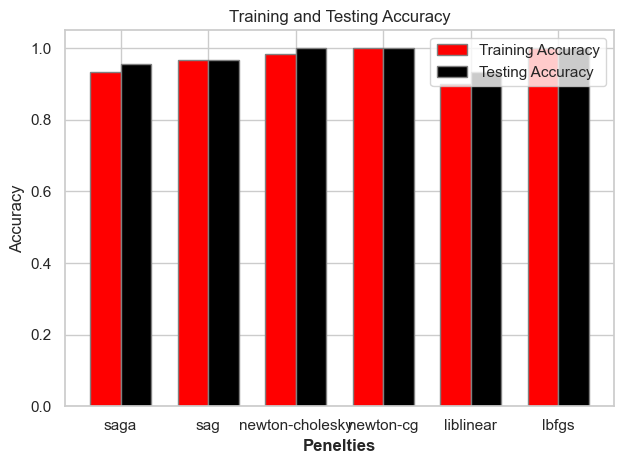

In [ ]:
solvers = ['saga','sag','newton-cholesky','newton-cg','liblinear','lbfgs']

bar_width = 0.35

r1 = np.arange(len(solvers))
r2 = [x + bar_width for x in r1]

plt.bar(r1, trainAccuracies, color='red', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testAccuracies, color='black', width=bar_width, edgecolor='grey', label='Testing Accuracy')

plt.xlabel('Penelties', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], solvers)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#lbfgs,newton-cg and sag solvers performing best in my case!!

In [ ]:
dataset = pd.read_csv('heart.csv')
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
x = dataset.drop('target', axis = 1)
y = dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

trainAccuracies = []
testAccuracies = []

In [ ]:
print("=================(Solver = saga)=================\n")
LR = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = saga)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.84


In [ ]:
print("=================(Solver = sag)=================\n")
LR = LogisticRegression(penalty='l2',solver='sag',l1_ratio=0.3,max_iter=10000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = sag)=================



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training Accuracy : 0.85
Testing Accuracy  : 0.83


In [ ]:
print("=================(Solver = newton-cholesky)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cholesky',l1_ratio=0.3,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cholesky)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [ ]:
print("=================(Solver = newton-cg)=================\n")
LR = LogisticRegression(penalty='l2',solver='newton-cg',l1_ratio=0.3,max_iter=1000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = newton-cg)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [ ]:
print("=================(Solver = liblinear)=================\n")
LR = LogisticRegression(penalty='l1',solver='liblinear',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

=================(Solver = liblinear)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
print("=================(Solver = lbfgs)=================\n")
LR = LogisticRegression(penalty='l2',solver='lbfgs',l1_ratio=0.5,max_iter=100000)

modelLR = LR.fit(X_train,Y_train)
prediction = modelLR.predict(X_test)

accTrain = LR.score(X_train,Y_train)
print(f"Training Accuracy : {accTrain.round(2)}")

accTest = accuracy_score(Y_test,prediction)
print(f"Testing Accuracy  : {accTest.round(2)}")

trainAccuracies.append(accTrain)
testAccuracies.append(accTest)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


=================(Solver = lbfgs)=================

Training Accuracy : 0.85
Testing Accuracy  : 0.83


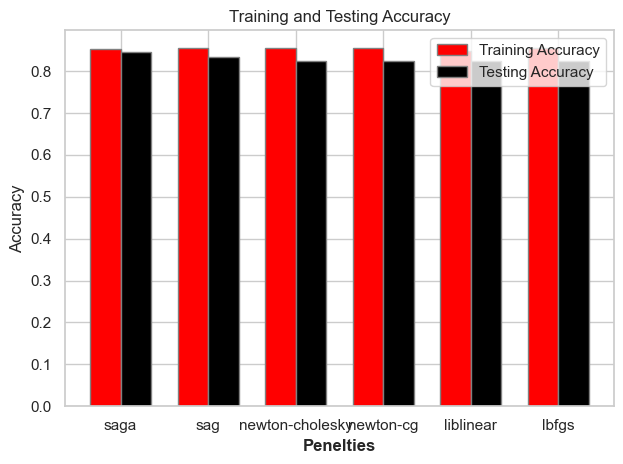

In [ ]:
solvers = ['saga','sag','newton-cholesky','newton-cg','liblinear','lbfgs']

bar_width = 0.35

r1 = np.arange(len(solvers))
r2 = [x + bar_width for x in r1]

plt.bar(r1, trainAccuracies, color='red', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r2, testAccuracies, color='black', width=bar_width, edgecolor='grey', label='Testing Accuracy')

plt.xlabel('Penelties', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], solvers)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# Task 03

In [ ]:
dataset = pd.read_csv('iris.csv')
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = irisDataset.drop('Species',axis=1)
Y = irisDataset['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.6, random_state=42)

trainAccuracies = []
testAccuracies = []

In [ ]:
logReg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=100000)

#LR
logReg.fit(X_train, Y_train)
logregTrainPred = logReg.predict(X_train)
logregTestPred = logReg.predict(X_test)

logregTrainAcc = accuracy_score(Y_train, logregTrainPred)
logregTestAcc = accuracy_score(Y_test, logregTestPred)

print("Logistic Regression Results:")
print(f"Training Accuracy: {logregTrainAcc:.4f}")
print(f"Testing Accuracy: {logregTestAcc:.4f}")

Logistic Regression Results:
Training Accuracy: 0.9000
Testing Accuracy: 0.9333


In [ ]:
#Perceptron
perceptron = Perceptron(max_iter=100, random_state=42,eta0=0.8,validation_fraction=0.4,n_iter_no_change=9)
perceptron.fit(X_train, Y_train)
perceptronTrainPred = perceptron.predict(X_train)
perceptronTestPred = perceptron.predict(X_test)

perceptronTrainAcc = accuracy_score(Y_train, perceptronTrainPred)
perceptronTestAcc = accuracy_score(Y_test, perceptronTestPred)

print("Perceptron Results:")
print(f"Training Accuracy: {perceptronTrainAcc:.4f}")
print(f"Testing Accuracy: {perceptronTestAcc:.4f}")

Perceptron Results:
Training Accuracy: 0.6500
Testing Accuracy: 0.6778


In [ ]:
#Comparision

if (logregTrainAcc > perceptronTrainAcc) and (logregTestAcc > perceptronTestAcc):
    print(f"Logistic Regression Have High Accurcay, Train:{logregTrainAcc}, Testing: {logregTestAcc}")
else:
    print(f"Perceptron Have High Accurcay, Train:{perceptronTrainAcc}, Testing: {perceptronTestAcc}")

Logistic Regression Have High Accurcay, Train:0.9, Testing: 0.9333333333333333


# WINE DATASET

In [ ]:
dataset = pd.read_csv('WineQT.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#(Basic Infromation And Statistical Summary)
print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
Information: 
 None


Statistica Summary: 
        fixed acidity  volatile 

In [ ]:
if dataset.isnull().values.any():
    missingValues = dataset.isnull().sum()
    print("Missing Values:\n", missingValues)

    cleanedDataset = dataset.fillna(dataset.mean())
    print("Dataset After Removing Missing Values: ", cleanedDataset)
else:
    print("No missing values in the dataset.")


if dataset.duplicated().any():
    duplicateRecords = dataset.duplicated().sum()
    print("\nDuplicate Records:\n", duplicateRecords)

    cleanedDataset = dataset.drop_duplicates()
    print("Dataset After Removing Duplicates: ", cleanedDataset)
else:
    print("No duplicate records in the dataset.")

categoricalFeatures = dataset.select_dtypes(include=['object']).columns
if len(categoricalFeatures > 0):
    print("\nCategorical Features:\n", categoricalFeatures)
else:
    print("No Categorical Features Exists in the dataset.")

No missing values in the dataset.
No duplicate records in the dataset.
No Categorical Features Exists in the dataset.


In [ ]:
print(dataset['quality'].value_counts())

dataset['quality'] = (dataset['quality'] >= 6).astype(int)

target = 'quality'

X = dataset.drop(target,axis=1)
Y = dataset[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


In [ ]:
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')) #INPUT LAYER
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #OUTPUT LAYER

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# Train the model on the training data
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

#Evaluate Data On Test Data
testLoss, testAccuracy, testPrecision, testRecall = model.evaluate(X_test, Y_test)

# Print the evaluation metrics
print(f"Test Accuracy: {testAccuracy:.4f}")
print(f"Test Precision: {testPrecision:.4f}")
print(f"Test Recall: {testRecall:.4f}")


yPred = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
yPredClasses = (yPred > 0.5).astype(int)

# Compute F1 Score
testF1Score = f1_score(Y_test, yPredClasses)
print(f"Test F1 Score: {testF1Score:.4f}")


Epoch 1/50


C:\Users\k228729\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5550 - loss: 0.6820 - precision_3: 0.7192 - recall_3: 0.2811 - val_accuracy: 0.7424 - val_loss: 0.5661 - val_precision_3: 0.7615 - val_recall_3: 0.7795
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.5519 - precision_3: 0.7991 - recall_3: 0.7448 - val_accuracy: 0.7205 - val_loss: 0.5266 - val_precision_3: 0.7603 - val_recall_3: 0.7244
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7430 - loss: 0.5181 - precision_3: 0.7780 - recall_3: 0.7319 - val_accuracy: 0.7293 - val_loss: 0.5227 - val_precision_3: 0.7481 - val_recall_3: 0.7717
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7692 - loss: 0.4674 - precision_3: 0.7862 - recall_3: 0.7854 - val_accuracy: 0.7380 - val_loss: 0.5194 - val_precision_3: 0.7769 - val_recall_3: 0.7402
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7797 - loss: 0.4736 - precision_3: 0.8389 - recall_3: 0.7341 - val_accuracy: 0.764

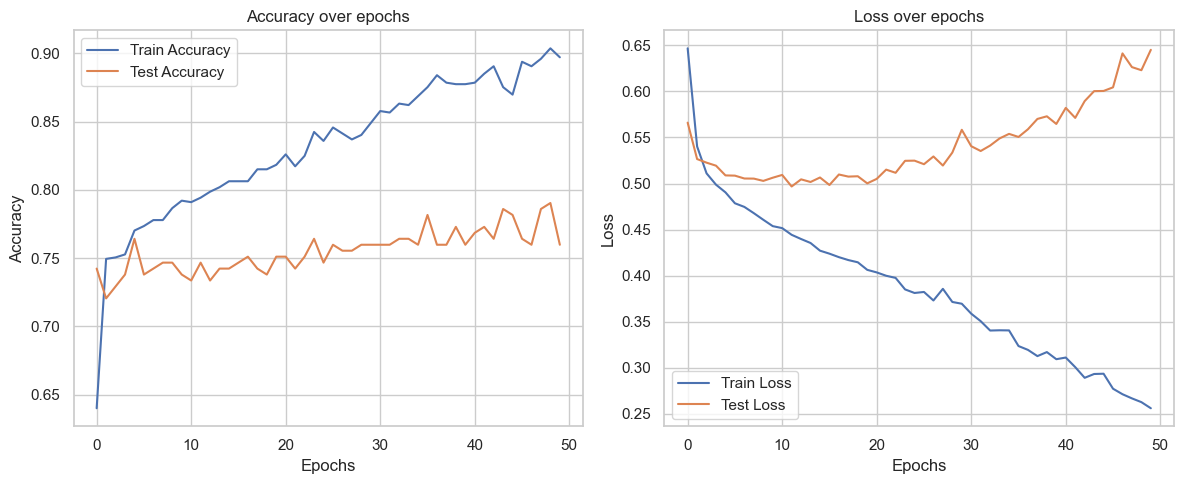

In [ ]:
#PLOTTING

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()